In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.shape

(150, 5)

In [14]:
X = df.drop("species", axis=1)
y = df["species"]
X.shape

(150, 4)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test.shape

(30, 4)

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
lr_report = classification_report(y_test,y_pred,output_dict=True)
lr_report

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0},
 'versicolor': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 9.0},
 'virginica': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 11.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 30.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 30.0}}

In [19]:
lr_acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
lr_acc

1.0

In [20]:
lr_report_df = pd.DataFrame(lr_report).transpose()
lr_report_df

,precision,recall,f1-score,support
setosa,1.0,1.0,1.0,10.0
versicolor,1.0,1.0,1.0,9.0
virginica,1.0,1.0,1.0,11.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


Text(50.722222222222214, 0.5, 'actual')

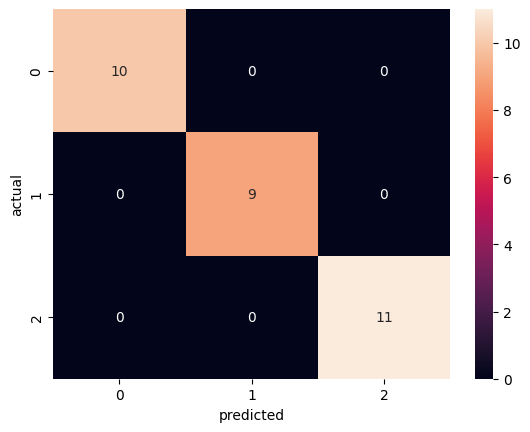

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")